In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
%matplotlib inline

In [7]:
import numpy as np

# генерация случайных величин по экспоненциональному закону распределения
variables = np.random.exponential(scale=1, size=25)

print(variables)

[4.73399968 1.38519831 1.3458472  0.46823087 2.59166076 0.14132905
 0.23341146 0.59488427 0.44012956 1.34392732 0.11438321 0.30516883
 1.02957589 2.7686478  0.36755174 2.39016639 0.04439473 0.45810146
 1.1571724  0.68488209 0.99541166 2.23682971 0.32402656 1.4331448
 0.65275262]


In [8]:
# расчитать моду
mode = stats.mode(variables)[0]

# расчитать медиану
median = np.median(variables)

# расчитать размах
span = np.max(variables) - np.min(variables)

# расчитать коэффициент асимметрии
skewness = stats.skew(variables)

print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Размах: {span}")
print(f"Коэффициент асимметрии: {skewness}")

Мода: 0.04439473199626167
Медиана: 0.6848820948201592
Размах: 4.689604943756192
Коэффициент асимметрии: 1.6419068904402498


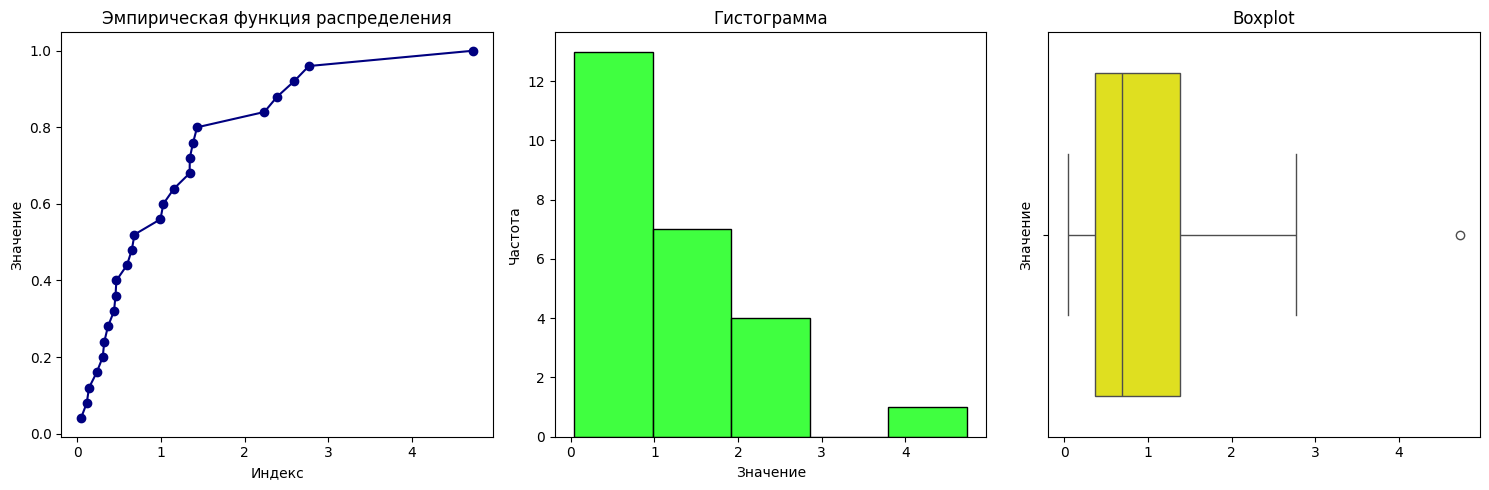

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

ecdf = sm.distributions.ECDF(variables)
x = np.sort(variables)
y = ecdf(x)
axs[0].plot(x, y, marker='o', linestyle='-', color='navy')
axs[0].set_title('Эмпирическая функция распределения')
axs[0].set_xlabel('Индекс')
axs[0].set_ylabel('Значение')

# Histogram of the sample
sns.histplot(variables, bins=5, kde=False, color='lime', ax=axs[1])
axs[1].set_title('Гистограмма')
axs[1].set_xlabel('Значение')
axs[1].set_ylabel('Частота')

# Boxplot of the sample
sns.boxplot(x=variables, color='yellow', ax=axs[2], orient='h')
axs[2].set_title('Boxplot')
axs[2].set_ylabel('Значение')

plt.tight_layout()
plt.show()

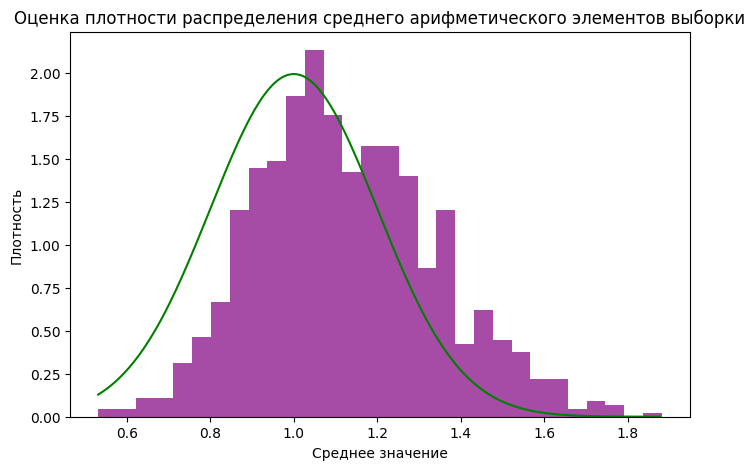

In [10]:
num_resamples = 1000

bootstrap_means = []
for _ in range(num_resamples):
    resample = np.random.choice(variables, size=len(variables), replace=True)
    bootstrap_means.append(np.average(resample))

plt.figure(figsize=(8, 5))
plt.hist(bootstrap_means, bins=30, density=True, color='purple', alpha=0.7)
x = np.arange(min(bootstrap_means), max(bootstrap_means), 0.005)
plt.plot(x, norm.pdf(x, 1, 1/5), color="green")
plt.title('Оценка плотности распределения среднего арифметического элементов выборки')
plt.xlabel('Среднее значение')
plt.ylabel('Плотность')
plt.show()

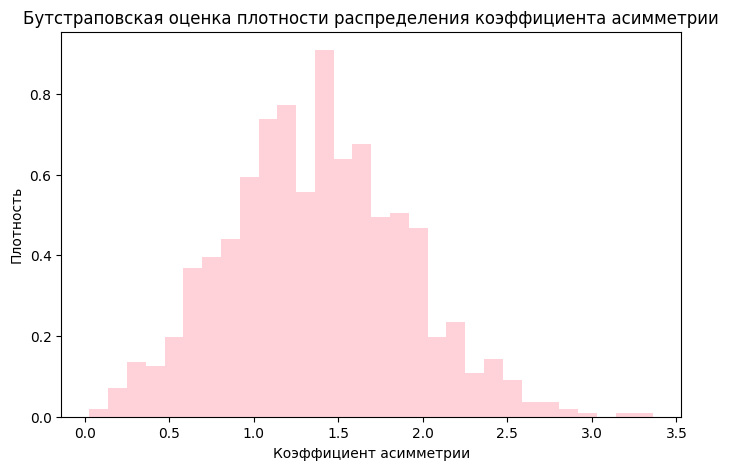

In [11]:
num_resamples = 1000

bootstrap_skewness = []
for _ in range(num_resamples):
    resample = np.random.choice(variables, size=len(variables), replace=True)
    skewness = stats.skew(resample)
    bootstrap_skewness.append(skewness)

plt.figure(figsize=(8, 5))
plt.hist(bootstrap_skewness, bins=30, density=True, color='pink', alpha=0.7)
plt.title('Бутстраповская оценка плотности распределения коэффициента асимметрии')
plt.xlabel('Коэффициент асимметрии')
plt.ylabel('Плотность')
plt.show()

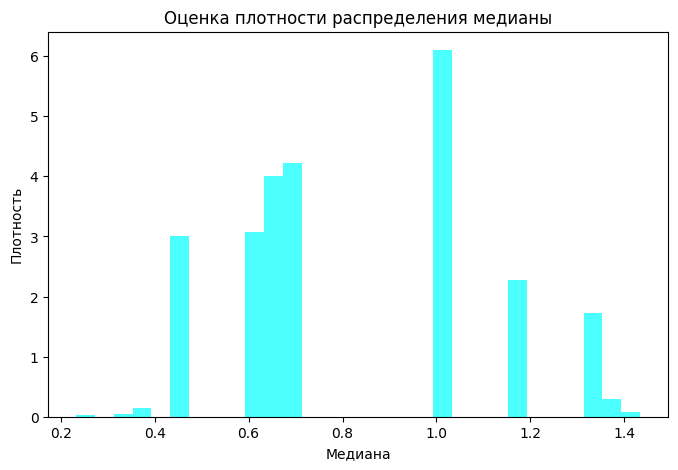

In [12]:
num_resamples = 1000

bootstrap_medians = []
for _ in range(num_resamples):
    resample = np.random.choice(variables, size=len(variables), replace=True)
    median = np.median(resample)
    bootstrap_medians.append(median)

plt.figure(figsize=(8, 5))
plt.hist(bootstrap_medians, bins=30, density=True, color='cyan', alpha=0.7)
plt.title('Оценка плотности распределения медианы')
plt.xlabel('Медиана')
plt.ylabel('Плотность')
plt.show()